# 아이템 기반 최근접 이웃 협업 필터링 실습

## 실습: grouplens 사이트의 movielens 데이터 활용

### 데이터 불러오기

In [1]:
import pandas as pd

#### 영화정보 데이터

In [4]:
movie_df = pd.read_csv('./필요 데이터/ml-latest-small/movies.csv')
movie_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#### 평점 정보 데이터

In [3]:
rating_df = pd.read_csv('./필요 데이터/ml-latest-small/ratings.csv')
rating_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
rating_df = rating_df.drop('timestamp', axis = 1)
rating_df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


### 평점 데이터프레임을 아이템- 사용자 데이터프레임화

In [6]:
rating_mat = rating_df.pivot_table(index = 'movieId',
                                   columns = 'userId',
                                   values = 'rating')
rating_mat

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 인덱스를 영화명으로 변경

In [9]:
movie_df.movieId.nunique()

9742

In [22]:
rating_movies = pd.merge(rating_df, movie_df, on = 'movieId')
rating_movies

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,Blair Witch (2016),Horror|Thriller


In [23]:
rating_movies = rating_movies.pivot_table(index = 'userId',
                                          columns = 'title',
                                          values = 'rating')
rating_movies = rating_movies.fillna(0)
rating_movies

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.5,3.5,0.0,0.0,0.0


### 영화 간 유사도 산출

In [24]:
from sklearn.metrics.pairwise import cosine_similarity

In [26]:
movie_sim = cosine_similarity(rating_movies.T, rating_movies.T)

movie_sim_df = pd.DataFrame(movie_sim, index = rating_movies.columns, columns = rating_movies.columns)
movie_sim_df.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.141653,0.0,...,0.0,0.342055,0.543305,0.707107,0.0,0.0,0.139431,0.327327,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,1.000000,0.707107,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Round Midnight (1986),0.0,0.707107,1.000000,0.000000,0.000000,0.0,0.176777,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Salem's Lot (2004),0.0,0.000000,0.000000,1.000000,0.857493,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Til There Was You (1997),0.0,0.000000,0.000000,0.857493,1.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


### 아이템 기반 최근접 이웃 협업 필터링으로 추천
- 위 예제의 아이템 기반 영화 유사도 데이터는 모든 사용자의 평점을 기준으로 영화의 유사도를 생성했음
- 하지만 이는 개인적인 취향을 반영하지 않고 영화 간의 유사도만 가지고 추천한 것
<br>
<br>
- 영화 유사도 데이터를 이용해 최근접 이웃 협업 필터링으로 개인에게 최적화된 영화 추천을 구현하겠음
    - 특징
        - 개인이 아직 관람하지 않은 영화를 추천한다는 것
        - 아직 관람하지 않은 영화에 대해서 아이템 유사도와 기존에 관람한 영화의 평점 데이터를 기반으로 해서 새롭게 모든 영화의 예측 평점을 계산한 후, 높은 예측 평점을 가진 영화를 추천하는 방식
        
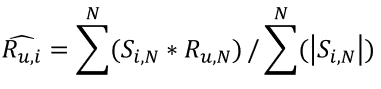
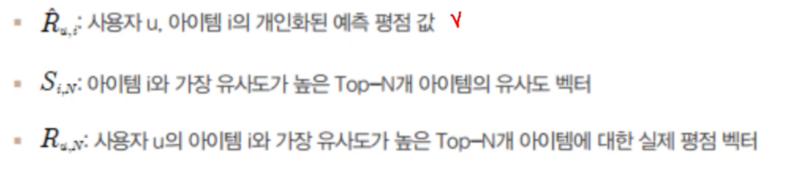

In [38]:
movie_sim_df.head(2)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.141653,0.0,...,0.0,0.342055,0.543305,0.707107,0.0,0.0,0.139431,0.327327,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,1.0,0.707107,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


In [39]:
rating_movies.head(2)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
import numpy as np

#### 예측 평점 구하기

In [45]:
def pred_rating(movie_similarity_df, user_item_df):
    df = user_item_df.dot(movie_similarity_df) / np.abs(movie_similarity_df).sum(axis = 1)
    df.columns = user_item_df.columns
    return df

pred_rating_df = pred_rating(movie_sim, rating_movies)
pred_rating_df.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.070345,0.577855,0.321696,0.227055,0.206958,0.194615,0.249883,0.102542,0.157084,0.178197,...,0.113608,0.181738,0.133962,0.128574,0.006179,0.212070,0.192921,0.136024,0.292955,0.720347
2,0.018260,0.042744,0.018861,0.000000,0.000000,0.035995,0.013413,0.002314,0.032213,0.014863,...,0.015640,0.020855,0.020119,0.015745,0.049983,0.014876,0.021616,0.024528,0.017563,0.000000
3,0.011884,0.030279,0.064437,0.003762,0.003749,0.002722,0.014625,0.002085,0.005666,0.006272,...,0.006923,0.011665,0.011800,0.012225,0.000000,0.008194,0.007017,0.009229,0.010420,0.084501
4,0.049145,0.277628,0.160448,0.206892,0.309632,0.042337,0.130048,0.116442,0.099785,0.097432,...,0.051269,0.076051,0.055563,0.054137,0.008343,0.159242,0.100941,0.062253,0.146054,0.231187
5,0.007278,0.066951,0.041879,0.013880,0.024842,0.018240,0.026405,0.018673,0.021591,0.018841,...,0.009689,0.022246,0.013360,0.012378,0.000000,0.025839,0.023712,0.018012,0.028133,0.052315


#### 실제 평점과의 차이 계산

In [47]:
from sklearn.metrics import mean_squared_error

In [57]:
def get_mse(pred, actual):
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    mse = mean_squared_error(pred, actual)
    return mse

get_mse(pred_rating_df.values, rating_movies.values)

9.895354759094706

#### 예측 평점 구하기: 유사성 적용

In [101]:
def predict_rating_topsim(user_item_df, movie_sim_df, top_n = 20):
    # numpy 행렬화
    movie_sim_arr = movie_sim_df.values
    user_item_arr = user_item_df.values
    
    # 유사도가 높은 top n개 인덱스 추출
    top_n_idxes = movie_sim_arr.argsort()[:, :-top_n -1:-1]
    
    # top_n개에 대해서만 예측 평점을 추출하기 위해 빈 행렬 만들기
    pred_arr = np.zeros_like(user_item_arr)
    
    for i in range(pred_arr.shape[0]):
        for j in range(pred_arr.shape[1]):
            if (i % 1000 == 0) and (j % 1000 ==0):
                print(f'{i} 행, {j}열 수행중')
            pred_arr[i, j] = user_item_arr[i,:][top_n_idxes[i]].dot(movie_sim_arr[:,j][top_n_idxes[j]].T)
            pred_arr[i, j] /= np.sum(np.abs(movie_sim_arr[top_n_idxes[i]]))
    
    
    return pred_arr 

In [ ]:
pred_arr = predict_rating_topsim(rating_movies, movie_sim_df, top_n = 20)

0 행, 0열 수행중
0 행, 1000열 수행중
0 행, 2000열 수행중
0 행, 3000열 수행중
0 행, 4000열 수행중
0 행, 5000열 수행중
0 행, 6000열 수행중
0 행, 7000열 수행중
0 행, 8000열 수행중
0 행, 9000열 수행중


In [ ]:
pred_df = pd.DataFrame(pred_arr, columns = rating_movies.columns, index = rating_movies.index)
pred_df.head()

#### 실제 평점과 예측 평점의 차이 평가

In [ ]:
get_mse(pred_df.values, rating_movies.values)

#### 보지 않은 영화에 대해 아이템 기반 협업 필터링을 통해 영화 추천하기

In [ ]:
# 보지 않은 영화 추출 사용자 함수 만들기

def unseen_movie(user_item_df, userId):    
    # 사용자의 영화 평점 기록 추출
    user_movie = user_item_df.loc[userId]
    
    # 보지 않은 영화리스트만 출력
    unseen_movie_idx = user_movie[user_movie == 0].index.tolist()
    unseen_movies = [user_item_df.columns[idx] for idx in unseen_movie_idx]
    
    return unseen_movies

In [ ]:
# 사용자가 보지 않은 영화를 사용자들이 남긴 평점으로 한 영화 유사도 기반 추천 사용자함수 만들기
def recommend_movie_by_userId(pred_df, unseen_list, user_Id, top_n = 10):
    return pred_df.loc[user_Id, unseen_list].sort_values(ascending = False)[:top_n]

In [ ]:
unseen_movie_list = unseen_movie(rating_movies, 9)

recommend_movie_by_userId(pred_df, unseen_movie_list, 9, 20)